In [23]:
import pandas as pd
import smtplib
import configparser

In [19]:
config = configparser.ConfigParser()
config.read('config.ini')

['config.ini']

In [12]:
config['SECTION1']['var1']

'1234'

In [13]:
config['SECTION2']['var1']

'Fabian Baez'

# Simple email 

In [14]:
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart


In [20]:
def send_text_email(recipient_list,subject,email_body):
    message =  MIMEMultipart()
    
    message['From'] = config['GMAIL']['sender']
    message['To'] = recipient_list   #list of recipients
    message['Subject'] = subject # string

    message.attach(MIMEText(email_body,'plain'))

    with smtplib.SMTP(config['GMAIL']['server'], config['GMAIL']['port']) as mail_server:
        mail_server.starttls()  # Start connection
        mail_server.login(config['GMAIL']['sender'],config['GMAIL']['password']) # provide user and password
        mail_server.send_message(message)#send the email 
    
    print('Email Sent')




In [22]:
send_text_email('operationalanalytics2@gmail.com','Hello Fabian' , 'Hello Fabian this is our email body')

Email Sent


In [25]:
grades_df = pd.read_csv('grades.csv')
grades_df.head()

,Username,Assignment: Working with process,Assignment: Control Charts Fundamentals,Assignment: Rule 5 Validation for Control Charts,Assignment:Quality Characteristic Identification,Week 1 Test Process and OA,Control Chart Test,Control Charts 2 Test [Total Pts: 100 Score] |843624,Quality Characteristics Test,Project: OA - Tools - Control Chart,Project: Sending seaborn chart week 1,Final Grade
0,777591658281597,90.0,100.0,85.0,83.0,40,40.0,50,100.0,NaN,100,88.84705
1,982753008148116,80.0,78.0,40.0,8.5,40,80.0,50,100.0,NaN,0,42.88676
2,361208528119714,60.0,88.0,90.0,41.5,40,40.0,0,100.0,NaN,100,74.86617
3,125055452243448,90.0,94.5,55.0,58.5,40,100.0,0,100.0,NaN,0,55.28823
4,309236635102423,73.0,77.0,65.0,91.5,40,60.0,50,100.0,NaN,100,82.00441


In [27]:
grades_df['Final Grade'].describe()

count    22.000000
mean     74.538130
std      18.974492
min      38.369110
25%      60.182715
50%      83.036760
75%      88.552385
max      93.889700
Name: Final Grade, dtype: float64

In [32]:
import seaborn as sns
import tempfile
from email.mime.image  import MIMEImage


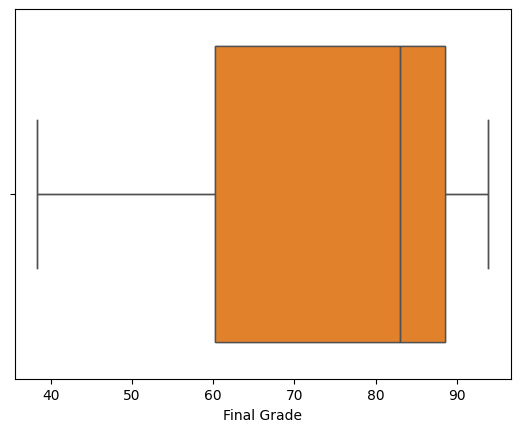

In [34]:
box_plot = sns.boxplot(data=grades_df,x='Final Grade')
box_plot.figure.savefig('name.png')
sns.boxplot(data=grades_df,x='Final Grade').figure.savefig('grades_boxplot.png')

In [35]:
def send_html_email(recipients, subject, body, sns_graph):
    message = MIMEMultipart('mixed')
    
    message['From'] = config['GMAIL']['sender']
    message['To'] = recipients   #list of recipients
    message['Subject'] = subject # string

    html_part =  MIMEText(body,'html')
    message.attach(html_part)

    temp_file =  tempfile.NamedTemporaryFile(suffix='.png', delete=False) #Crateing a temp file
    sns_graph.figure.savefig(temp_file.name) # save seaborn plot in the temporary file

    img = MIMEImage(temp_file.read())  # Creating an object 
    temp_file.close() # 

    #add hearders
    # match the name with the content_id
    img.add_header('Content-Disposition','inline',filename = 'graph1.png')
    img.add_header('Content-ID','<graph1.png>')
    
    message.attach(img)


    with smtplib.SMTP(config['GMAIL']['server'], config['GMAIL']['port']) as mail_server:
        mail_server.starttls()  # Start connection
        mail_server.login(config['GMAIL']['sender'],config['GMAIL']['password']) # provide user and password
        mail_server.send_message(message)#send the email 
    
    print('Email Sent')

In [ ]:
html_body = '''
<html>

    <body>
        <h2>Grades Results</h2>
        <p> Dear Students</p>
        <p> This is the boxplot</p>

        <img src="cid:graph1.png" >

    </body>
</html>

'''

